In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#upload the json file 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeeva86103","key":"39f3675abf2f8a710c1804566e79c020"}'}

In [ ]:
#make directory for kaggle
!mkdir ~/.kaggle


In [ ]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in the kaggle
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          25067        699  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1752         43  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1514         37  1.0              
fatihb/coffee-quality-data-cqi

In [ ]:
#download the dataset using api command
! kaggle datasets download -d akash2907/bird-species-classification

bird-species-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/bird-species-classification.zip

In [ ]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen=ImageDataGenerator(rescale=(1./255)) #rescale-->normalisation only

In [ ]:
train=train_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)
test=test_gen.flow_from_directory('/content/test_data/test_data',
                                  target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices,test.class_indices

({'blasti': 0,
  'bonegl': 1,
  'brhkyt': 2,
  'cbrtsh': 3,
  'cmnmyn': 4,
  'gretit': 5,
  'hilpig': 6,
  'himbul': 7,
  'himgri': 8,
  'hsparo': 9,
  'indvul': 10,
  'jglowl': 11,
  'lbicrw': 12,
  'mgprob': 13,
  'rebimg': 14,
  'wcrsrt': 15},
 {'blasti': 0,
  'bonegl': 1,
  'brhkyt': 2,
  'cbrtsh': 3,
  'cmnmyn': 4,
  'gretit': 5,
  'hilpig': 6,
  'himbul': 7,
  'himgri': 8,
  'hsparo': 9,
  'indvul': 10,
  'jglowl': 11,
  'lbicrw': 12,
  'mgprob': 13,
  'rebimg': 14,
  'wcrsrt': 15})

In [ ]:
#build the cnn model
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
#convolution layer
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3))) #3-->color image.1-->grayscale
#max_pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flattened layer
model.add(Flatten())
#fully connected(ANN)
model.add(Dense(45,activation='relu')) #1st hidden layer
model.add(Dense(16,activation='softmax')) #output layer 16--> 16classes only

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 123s 7s/step - loss: 4.9201 - accuracy: 0.0800 - val_loss: 2.7678 - val_accuracy: 0.1274
Epoch 2/10
19/19 [==============================] - 87s 5s/step - loss: 2.7612 - accuracy: 0.1067 - val_loss: 2.7664 - val_accuracy: 0.1274
Epoch 3/10
19/19 [==============================] - 88s 5s/step - loss: 2.7425 - accuracy: 0.0600 - val_loss: 2.7580 - val_accuracy: 0.1210
Epoch 4/10
19/19 [==============================] - 88s 5s/step - loss: 2.7134 - accuracy: 0.0400 - val_loss: 2.7554 - val_accuracy: 0.0510
Epoch 5/10
19/19 [==============================] - 86s 5s/step - loss: 2.6861 - accuracy: 0.0733 - val_loss: 2.7479 - val_accuracy: 0.1146
Epoch 6/10
19/19 [==============================] - 120s 7s/step - loss: 2.6941 - accuracy: 0.0467 - val_loss: 2.7509 - val_accuracy: 0.0255
Epoch 7/10
19/19 [==============================] - 119s 7s/step - loss: 2.7809 - accuracy: 0.0800 - val_loss: 2.7894 - val_accuracy: 0.1401
Epoch 8/10
19/19 

In [ ]:
model.save('birdspecies') #it will save the model in the local system

In [ ]:
#predict the model with real time image rat
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/predictbird.jpg',target_size=(120,120))

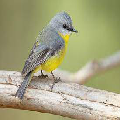

In [ ]:
img

In [ ]:
#convert the image to array
img=image.img_to_array(img)
img

array([[[127., 124.,  81.],
        [128., 125.,  82.],
        [130., 127.,  84.],
        ...,
        [119., 129.,  76.],
        [118., 128.,  75.],
        [117., 127.,  74.]],

       [[127., 124.,  81.],
        [128., 125.,  82.],
        [130., 127.,  84.],
        ...,
        [119., 129.,  76.],
        [118., 128.,  75.],
        [117., 127.,  74.]],

       [[127., 124.,  81.],
        [128., 125.,  82.],
        [130., 127.,  84.],
        ...,
        [119., 129.,  76.],
        [118., 128.,  75.],
        [117., 127.,  74.]],

       ...,

       [[150., 139.,  94.],
        [151., 140.,  95.],
        [152., 141.,  96.],
        ...,
        [130., 115.,  96.],
        [166., 150., 134.],
        [189., 179., 152.]],

       [[150., 139.,  94.],
        [151., 140.,  95.],
        [152., 141.,  96.],
        ...,
        [211., 193., 171.],
        [172., 153., 136.],
        [150., 138., 112.]],

       [[150., 139.,  94.],
        [151., 140.,  95.],
        [152., 1

In [ ]:
#expand the dimension from 2 to 3 because we use 3 channel rgb for tha model
img=np.expand_dims(img,axis=0)
img

array([[[[127., 124.,  81.],
         [128., 125.,  82.],
         [130., 127.,  84.],
         ...,
         [119., 129.,  76.],
         [118., 128.,  75.],
         [117., 127.,  74.]],

        [[127., 124.,  81.],
         [128., 125.,  82.],
         [130., 127.,  84.],
         ...,
         [119., 129.,  76.],
         [118., 128.,  75.],
         [117., 127.,  74.]],

        [[127., 124.,  81.],
         [128., 125.,  82.],
         [130., 127.,  84.],
         ...,
         [119., 129.,  76.],
         [118., 128.,  75.],
         [117., 127.,  74.]],

        ...,

        [[150., 139.,  94.],
         [151., 140.,  95.],
         [152., 141.,  96.],
         ...,
         [130., 115.,  96.],
         [166., 150., 134.],
         [189., 179., 152.]],

        [[150., 139.,  94.],
         [151., 140.,  95.],
         [152., 141.,  96.],
         ...,
         [211., 193., 171.],
         [172., 153., 136.],
         [150., 138., 112.]],

        [[150., 139.,  94.],
       

In [ ]:
model.predict(img) #predict the model 

1/1 [==============================] - 0s 189ms/step


array([[0.06575546, 0.05997727, 0.05963919, 0.06133765, 0.06119798,
        0.06039839, 0.06455894, 0.06626818, 0.06879628, 0.06154396,
        0.06346586, 0.05980243, 0.05920406, 0.06016595, 0.06341461,
        0.06447381]], dtype=float32)

In [ ]:
pred=np.argmax(model.predict(img))
out=['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
out[pred]

1/1 [==============================] - 0s 21ms/step


'himgri'